In [1]:
from matplotlib import pyplot as plt
import matplotlib as mpl
from matplotlib.offsetbox import AnchoredText
from matplotlib.ticker import MaxNLocator
import pandas as pd
import numpy as np
import yaml

In [2]:
# This import was added to give an option to run this on Klone and laptop by toggling different file paths depending on the OS 
from sys import platform

In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [4]:
if platform == 'linux':
    NO3NO2_xlxs='/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/spreadsheets/NO3NO2_load_timeseries.xlsx'
    NH4_xlxs='/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/spreadsheets/NH4_load_timeseries.xlsx'
    out_dir = "/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/graphics/whidbey/nutrient_loading"
else:
    NO3NO2_xlxs='/Users/rmueller/Projects/PugetSound_NutrientSourceReduction/OneDrive - UW/Documents/Nutrient Science/9. Modeling/9.Preprocessing_SSMC/3.point_nonpoint_info_scenarios/NO3NO2_load_timeseries.xlsx'
    NH4_xlxs='/Users/rmueller/Projects/PugetSound_NutrientSourceReduction/OneDrive - UW/Documents/Nutrient Science/9. Modeling/9.Preprocessing_SSMC/3.point_nonpoint_info_scenarios/NH4_load_timeseries.xlsx'
    out_dir = "/Users/rmueller/Projects/PugetSound_NutrientSourceReduction/graphics/nutrient_loading"

# tabs are organized by run, e.g. "ssm_pnt_wq_2a"
# columns are organized by name of river or WWTP

In [5]:
# The following WWTP names are from the "Table NLoading1" tab of 
# https://uwnetid.sharepoint.com/:x:/r/sites/og_uwt_psi/_layouts/15/Doc.aspx?sourcedoc=%7B3788B09C-126F-40BF-86AF-22DEC185E831%7D&file=SOG_NB_Figures%26Tables.xlsx&action=default&mobileredirect=true

# The two spaces in front of names reflects formatting of column names in 
# excel spreadsheet
WWTP_names = [
  "  Coupeville",
  "  Everett Snohomish",
  "  La Conner",
  "  Lake Stevens 002",
  "  Langley",
  "  Marysville",
  "  Mt Vernon",
  "  Mukilteo",
  "  Oak Harbor Lagoon",
  "  OF100",
  "  Penn Cove",
  "  Skagit County 2 Big Lake",
  "  Snohomish",
  "  Stanwood",
  "  Swinomish",
  "  Tulalip",
  "  Warm Beach Campground"
]

# Some rivers discharge into more than one node and have nutrient
# loading in two columns (namely: Nooksack and Samish Bell).
# Nutrient loading for these rivers is the sum of the columns
river_names = [
  "  Skagit R_1",
  "  Skagit R_2",
  "  Snohomish R_1",
  "  Snohomish R_2",
  "  Stillaguamish R_1",
  "  Stillaguamish R_2",
  "  Whidbey east"
]

In [6]:
# load setup information
with open('../etc/SSM_config_whidbey.yaml', 'r') as file:
    ssm = yaml.safe_load(file)
# rename existing and reference tags to match Su Kyong's labels
ssm['run_information']['run_tag']['whidbey']['wqm_baseline'] = "exist"
ssm['run_information']['run_tag']['whidbey']['wqm_reference'] = "ref"

In [7]:
run_tag_all =[ssm['run_information']['run_tag']['whidbey'][run_name] for run_name in [*ssm['run_information']['run_tag']['whidbey']]]
run_tag_wwtp =[ssm['run_information']['whidbey_WWTPs'][run_name] for run_name in [*ssm['run_information']['whidbey_WWTPs']]]
run_tag_rivers =[ssm['run_information']['whidbey_rivers'][run_name] for run_name in [*ssm['run_information']['whidbey_rivers']]]
print("All runs: ", run_tag_all)
print("WWTP runs: ", run_tag_wwtp)
print("River runs: ", run_tag_rivers)

All runs:  ['3b', '3c', '3e', '3f', '3g', '3h', '3i', '3l', '3m', 'exist', 'ref']
WWTP runs:  ['3b', '3c', '3e', '3f', '3g', '3h', '3i', '2014 conditions', 'Reference conditions']
River runs:  ['3l', '3m', '2014 conditions', 'Reference conditions']


In [8]:
run_description_all =[run_name for run_name in [*ssm['run_information']['run_tag']['whidbey']]]
run_description_wwtp =[run_name for run_name in [*ssm['run_information']['whidbey_WWTPs']]]
run_description_rivers =[run_name for run_name in [*ssm['run_information']['whidbey_rivers']]]

## Plot up WWTP nutrient loading

findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


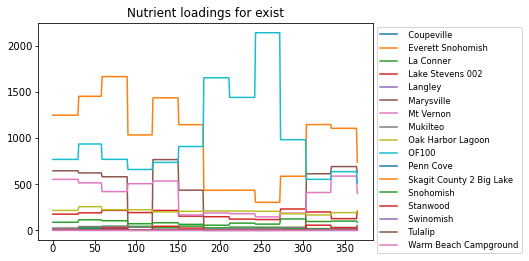

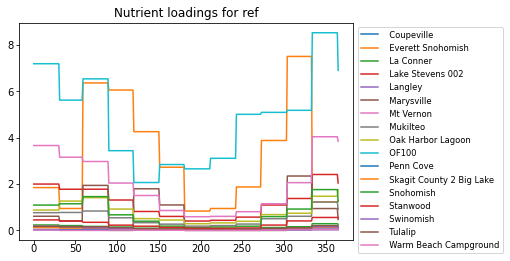

In [9]:
wwtp_df={}
wwtpNH4_df={}
wwtpNO3NO2_df={}
for idx,run_tag in enumerate(['exist','ref']):
    # read in data
    # spreadsheets in workbook organized by names in format of, e.g., "ssm_pnt_wq_exist"
    # I use the run tags to select the desired spreadsheet
    wwtpNO3NO2_df[run_tag] = pd.read_excel(
        NO3NO2_xlxs,
        sheet_name=f'ssm_pnt_wq_{run_tag}',
        usecols=WWTP_names
    )
    wwtpNH4_df[run_tag] = pd.read_excel(
        NH4_xlxs,
        sheet_name=f'ssm_pnt_wq_{run_tag}',
        usecols=WWTP_names
    )
    wwtp_df[run_tag]=wwtpNO3NO2_df[run_tag]+wwtpNH4_df[run_tag]
    # The column names have spaces in front of the names.  
    wwtp_df[run_tag].plot()
    plt.legend(loc=2,bbox_to_anchor=(1.0, 1.0))
    plt.title(f"Nutrient loadings for {run_tag}")
    plt.savefig(
        f'{out_dir}/ssm_pnt_wq_{run_tag}.png', 
        dpi=300,
        bbox_inches='tight'
    )

## plot existing and reference conditions

In [10]:
mpl.rc('font', size=11)
# some of the following may be repetetive but can also be set relative to the font value above 
#    (eg "xx-small, x-small,small, medium, large, x-large, xx-large, larger, or smaller"; see link above for details)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rc('legend', fontsize=12)
mpl.rc('axes', titlesize=16)
mpl.rc('axes', labelsize=12)
mpl.rc('figure', titlesize=16)
mpl.rc('text', usetex=False)
mpl.rc('font', family='sans-serif', weight='normal', style='normal')

In [11]:
# create a pretty x-axis. 
run_tag='exist'

# Load (un-named) time column 'Unnamed: 0'
df=pd.read_excel(
    NO3NO2_xlxs,
    sheet_name=f'ssm_pnt_wq_{run_tag}',
    usecols=[0]
)
time = df['Unnamed: 0']
ticks = [time[time==f'2014-{str(MM).zfill(2)}-15 00:00:00'].item() for MM in np.arange(1,13)]
ticklabels=[str(MM).zfill(2) for MM in np.arange(1,13)]

In [12]:
time

0     2014-01-01
1     2014-01-02
2     2014-01-03
3     2014-01-04
4     2014-01-05
         ...    
361   2014-12-28
362   2014-12-29
363   2014-12-30
364   2014-12-31
365   2015-01-01
Name: Unnamed: 0, Length: 366, dtype: datetime64[ns]

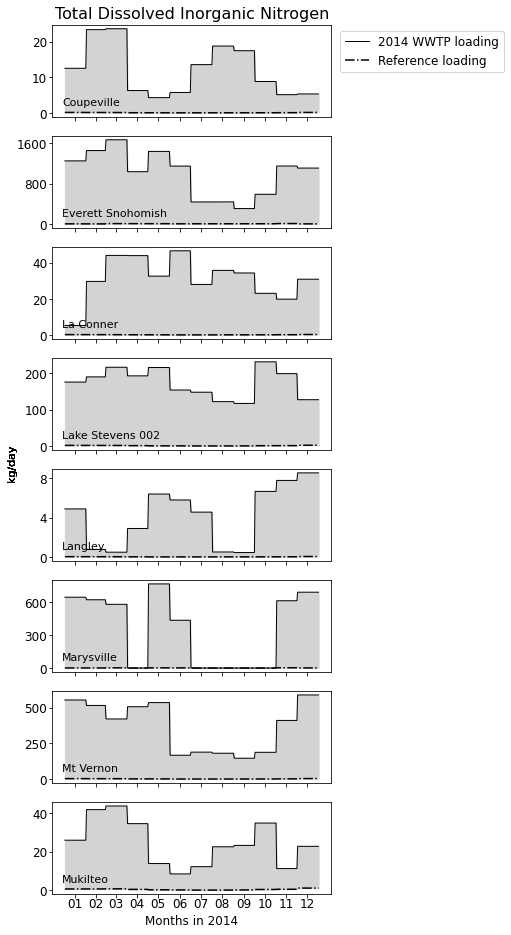

In [13]:
fig, axs = plt.subplots(8, 1,figsize = (5,2*8))
for idx,wwtp in enumerate(WWTP_names[0:8]):
    existing = wwtp_df['exist'][wwtp][0:-1]
    reference = wwtp_df['ref'][wwtp][0:-1]
    x=np.arange(len(existing))
    # plot 2014 conditions
    axs[idx].plot(time[:-1],existing,
        color = ssm['bw_line']['color']['baseline'],
        lw=ssm['bw_line']['width']['baseline'],
        ls=ssm['bw_line']['style']['baseline'],
        label='2014 WWTP loading'
    )
    # plot reference conditions
    axs[idx].plot(time[:-1], reference,
        color = ssm['bw_line']['color']['reference'],
        lw=ssm['bw_line']['width']['reference'],
        ls=ssm['bw_line']['style']['reference'],
        label='Reference loading'
    )
    # shade in region between existing and reference
    axs[idx].fill_between(time[:-1], existing, reference, color='lightgrey')
    axs[idx].yaxis.set_major_locator(MaxNLocator(3)) 
    axs[idx].xaxis.set_major_locator(MaxNLocator(14)) 
    fig.text(0.0, 0.5, 'kg/day', va='center', rotation='vertical')
    #axs[idx].set_ylabel('kg/day')
    if idx==7:
        axs[idx].set_xlabel('Months in 2014')
        axs[idx].set_xticks(ticks)
        axs[idx].set_xticklabels(ticklabels)
    else:
        axs[idx].set_xticks(ticks)
        axs[idx].set_xticklabels('')
    if idx==0:
        axs[idx].set_title('Total Dissolved Inorganic Nitrogen')
        axs[idx].legend(loc=2,bbox_to_anchor=(1.01, 1.0))
    anchored_text = AnchoredText(
        wwtp[2:], 
        loc='lower left',
        frameon=False,
        prop=dict(fontweight="normal",color="black")
    )
    axs[idx].add_artist(anchored_text)   
plt.savefig(
    f'{out_dir}/whidbey_WWTP_loadings_a.png', 
    dpi=300,
    bbox_inches='tight'
)
plt.show()

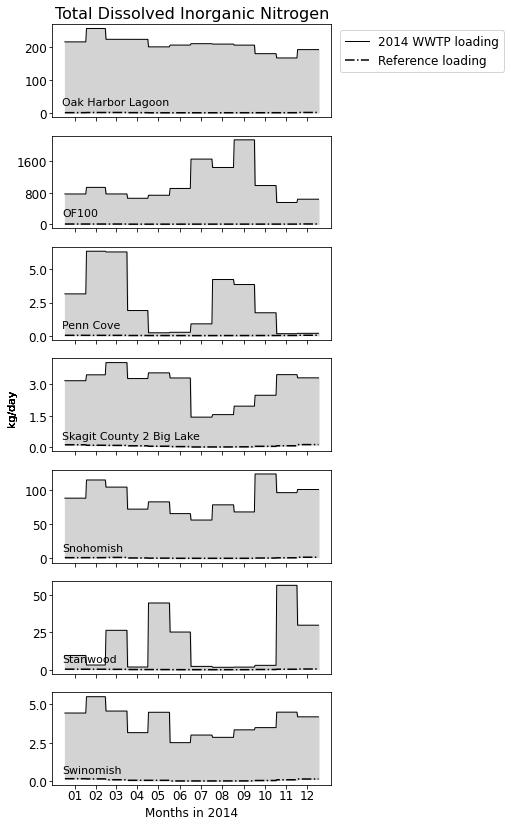

In [14]:
fig, axs = plt.subplots(7, 1,figsize = (5,2*7))
for idx,wwtp in enumerate(WWTP_names[8:15]):
    existing = wwtp_df['exist'][wwtp][0:-1]
    reference = wwtp_df['ref'][wwtp][0:-1]
    x=np.arange(len(existing))
    # plot 2014 conditions
    axs[idx].plot(time[:-1],existing,
        color = ssm['bw_line']['color']['baseline'],
        lw=ssm['bw_line']['width']['baseline'],
        ls=ssm['bw_line']['style']['baseline'],
        label='2014 WWTP loading'
    )
    # plot reference conditions
    axs[idx].plot(time[:-1], reference,
        color = ssm['bw_line']['color']['reference'],
        lw=ssm['bw_line']['width']['reference'],
        ls=ssm['bw_line']['style']['reference'],
        label='Reference loading'
    )
    # shade in region between existing and reference
    axs[idx].fill_between(time[:-1], existing, reference, color='lightgrey')
    axs[idx].yaxis.set_major_locator(MaxNLocator(3)) 
    axs[idx].xaxis.set_major_locator(MaxNLocator(14)) 
    fig.text(0.0, 0.5, 'kg/day', va='center', rotation='vertical')
    #axs[idx].set_ylabel('kg/day')
    if idx==6:
        axs[idx].set_xlabel('Months in 2014')
        axs[idx].set_xticks(ticks)
        axs[idx].set_xticklabels(ticklabels)
    else:
        axs[idx].set_xticks(ticks)
        axs[idx].set_xticklabels('')
    if idx==0:
        axs[idx].set_title('Total Dissolved Inorganic Nitrogen')
        axs[idx].legend(loc=2, bbox_to_anchor=(1.01, 1.0))
    anchored_text = AnchoredText(
        wwtp[2:], 
        loc='lower left',
        frameon=False,
        prop=dict(fontweight="normal",color="black")
    )
    axs[idx].add_artist(anchored_text)   
plt.savefig(
    f'{out_dir}/whidbey_WWTP_loadings_b.png', 
    dpi=300,
    bbox_inches='tight'
)
plt.show()

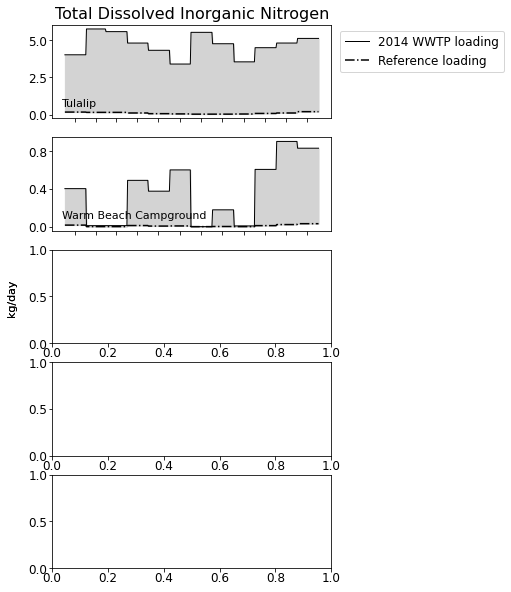

In [15]:
fig, axs = plt.subplots(5, 1,figsize = (5,2*5))
for idx,wwtp in enumerate(WWTP_names[15:20]):
    existing = wwtp_df['exist'][wwtp][0:-1]
    reference = wwtp_df['ref'][wwtp][0:-1]
    x=np.arange(len(existing))
    # plot 2014 conditions
    axs[idx].plot(time[:-1],existing,
        color = ssm['bw_line']['color']['baseline'],
        lw=ssm['bw_line']['width']['baseline'],
        ls=ssm['bw_line']['style']['baseline'],
        label='2014 WWTP loading'
    )
    # plot reference conditions
    axs[idx].plot(time[:-1], reference,
        color = ssm['bw_line']['color']['reference'],
        lw=ssm['bw_line']['width']['reference'],
        ls=ssm['bw_line']['style']['reference'],
        label='Reference loading'
    )
    # shade in region between existing and reference
    axs[idx].fill_between(time[:-1], existing, reference, color='lightgrey')
    axs[idx].yaxis.set_major_locator(MaxNLocator(3)) 
    axs[idx].xaxis.set_major_locator(MaxNLocator(14)) 
    fig.text(0.0, 0.5, 'kg/day', va='center', rotation='vertical')
    #axs[idx].set_ylabel('kg/day')
    if idx==4:
        axs[idx].set_xlabel('Months in 2014')
        axs[idx].set_xticks(ticks)
        axs[idx].set_xticklabels(ticklabels)
    else:
        axs[idx].set_xticks(ticks)
        axs[idx].set_xticklabels('')
    if idx==0:
        axs[idx].set_title('Total Dissolved Inorganic Nitrogen')
        axs[idx].legend(loc=2, bbox_to_anchor=(1.01, 1.0))
    anchored_text = AnchoredText(
        wwtp[2:], 
        loc='lower left',
        frameon=False,
        prop=dict(fontweight="normal",color="black")
    )
    axs[idx].add_artist(anchored_text)   
plt.savefig(
    f'{out_dir}/whidbey_WWTP_loadings_c.png', 
    dpi=300,
    bbox_inches='tight'
)
plt.show()

## Plot up river loadings

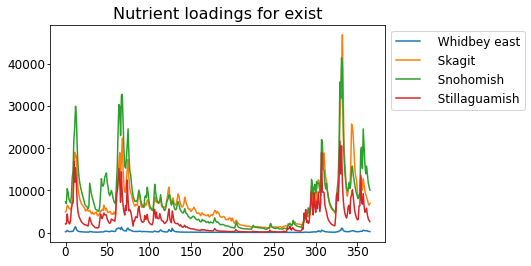

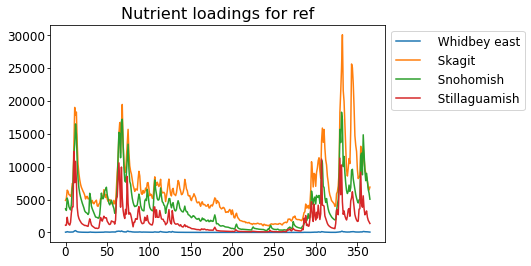

In [16]:
river_df={}
riverNH4_df={}
riverNO3NO2_df={}
for idx,run_tag in enumerate(['exist','ref']):
    # read in data
    # spreadsheets in workbook organized by names in format of, e.g., "ssm_pnt_wq_exist"
    # I use the run tags to select the desired spreadsheet
    riverNO3NO2_df[run_tag] = pd.read_excel(
        NO3NO2_xlxs,
        sheet_name=f'ssm_pnt_wq_{run_tag}',
        usecols=river_names
    )
    riverNH4_df[run_tag] = pd.read_excel(
        NH4_xlxs,
        sheet_name=f'ssm_pnt_wq_{run_tag}',
        usecols=river_names
    )
    # combine all nitrogen loading
    river_df[run_tag]=riverNO3NO2_df[run_tag]+riverNH4_df[run_tag]
    # combine Skagit, Snohomish, and Stillaguamish
    river_df[run_tag]["  Skagit"]=river_df[run_tag]["  Skagit R_1"] + river_df[run_tag]["  Skagit R_2"]
    river_df[run_tag]["  Snohomish"]=river_df[run_tag]["  Snohomish R_1"] + river_df[run_tag]["  Snohomish R_2"]
    river_df[run_tag]["  Stillaguamish"]=river_df[run_tag]["  Stillaguamish R_1"] + river_df[run_tag]["  Stillaguamish R_2"]
    river_df[run_tag] = river_df[run_tag].drop("  Skagit R_1", axis=1)
    river_df[run_tag] = river_df[run_tag].drop("  Skagit R_2", axis=1)
    river_df[run_tag] = river_df[run_tag].drop("  Snohomish R_1", axis=1)
    river_df[run_tag] = river_df[run_tag].drop("  Snohomish R_2", axis=1)
    river_df[run_tag] = river_df[run_tag].drop("  Stillaguamish R_1", axis=1)
    river_df[run_tag] = river_df[run_tag].drop("  Stillaguamish R_2", axis=1)
    # The column names have spaces in front of the names.  
    river_df[run_tag].plot()
    plt.legend(loc=2, bbox_to_anchor=(1.0, 1.0))
    plt.title(f"Nutrient loadings for {run_tag}")
    plt.savefig(
        f'{out_dir}/ssm_pnt_wq_{run_tag}_rivers.png', 
        dpi=300,
        bbox_inches='tight'
    )

/tmp/ipykernel_9308/2473198885.py:49: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(f'{out_dir}/whidbey_river_loadings.pdf',
/tmp/ipykernel_9308/2473198885.py:49: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(f'{out_dir}/whidbey_river_loadings.pdf',


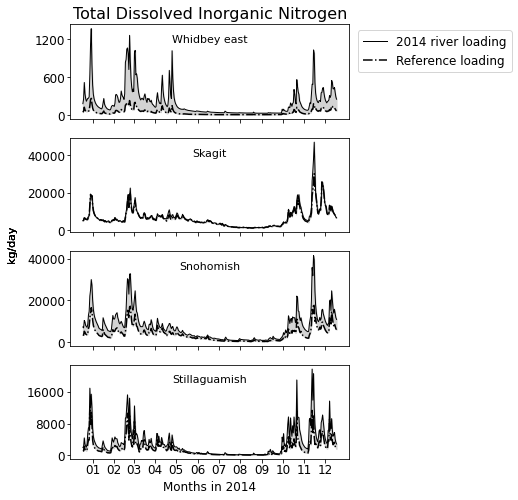

In [17]:
nrivers=4
fig, axs = plt.subplots(nrivers, 1,figsize = (5,2*nrivers))
for idx,river in enumerate([*river_df['exist']]):
    existing = river_df['exist'][river][0:-1]
    reference = river_df['ref'][river][0:-1]
    x=np.arange(len(existing))
    # plot 2014 conditions
    axs[idx].plot(time[:-1],existing,
        color = ssm['bw_line']['color']['baseline'],
        lw=ssm['bw_line']['width']['baseline'],
        ls=ssm['bw_line']['style']['baseline'],
        label='2014 river loading'
    )
    # plot reference conditions
    axs[idx].plot(time[:-1], reference,
        color = ssm['bw_line']['color']['reference'],
        lw=ssm['bw_line']['width']['reference'],
        ls=ssm['bw_line']['style']['reference'],
        label='Reference loading'
    )
    # shade in region between existing and reference
    axs[idx].fill_between(time[:-1], existing, reference, color='lightgrey')
    axs[idx].yaxis.set_major_locator(MaxNLocator(3)) 
    axs[idx].xaxis.set_major_locator(MaxNLocator(14)) 
    #axs[idx].set_ylabel('kg/day')
    fig.text(-0.05, 0.5, 'kg/day', va='center', rotation='vertical')
    if idx==3:
        axs[idx].set_xlabel('Months in 2014')
        axs[idx].set_xticks(ticks)
        axs[idx].set_xticklabels(ticklabels)
    else:
        axs[idx].set_xticks(ticks)
        axs[idx].set_xticklabels('')
    if idx==0:
        axs[idx].set_title('Total Dissolved Inorganic Nitrogen')
        axs[idx].legend(loc=2, bbox_to_anchor=(1.01, 1.0))
    anchored_text = AnchoredText(
        river[2:], 
        loc='upper center',
        frameon=False,
        prop=dict(fontweight="normal",color="black")
    )
    axs[idx].add_artist(anchored_text)   
plt.savefig(
    f'{out_dir}/whidbey_river_loadings.png', 
    dpi=300,
    bbox_inches='tight'
)
plt.savefig(f'{out_dir}/whidbey_river_loadings.pdf', 
    dpi=300, 
    facecolor='w',                                                
    edgecolor='w',
    orientation='portrait', 
    papertype='letter',                                  
    format='pdf',                                
    transparent=False,     
    bbox_inches="tight",                
    pad_inches=0.1,                         
    frameon=None,               
    metadata=None)
plt.show()

## All WWTPs in one

In [18]:
import datetime as dt
xticks = [dt.date(2014,month,1) for month in range(1,13)]
xticklabels = ('Jan','','Mar','','May','','Jul','','Sep','','Nov','')
xtickrotation=45

In [19]:
scale_factor = 1.5
mpl.rc('font', size=11*scale_factor)
# some of the following may be repetetive but can also be set relative to the font value above 
#    (eg "xx-small, x-small,small, medium, large, x-large, xx-large, larger, or smaller"; see link above for details)
mpl.rc('xtick', labelsize=12*scale_factor)
mpl.rc('ytick', labelsize=12*scale_factor)
mpl.rc('legend', fontsize=12*scale_factor)
mpl.rc('axes', titlesize=16*scale_factor)
mpl.rc('axes', labelsize=12*scale_factor)
mpl.rc('figure', titlesize=16*scale_factor)

fig, axs = plt.subplots(4, 4,figsize = (15,2*8))
col=0
for idx,wwtp in enumerate(WWTP_names[0:4]):
    existing = wwtp_df['exist'][wwtp][0:-2]
    reference = wwtp_df['ref'][wwtp][0:-2]
    # plot 2014 conditions
    axs[idx,col].plot(time[:-2],existing,
        color = ssm['bw_line']['color']['baseline'],
        lw=ssm['bw_line']['width']['baseline'],
        ls=ssm['bw_line']['style']['baseline'],
        label='2014'
    )
    # plot reference conditions
    axs[idx,col].plot(time[:-2], reference,
        color = ssm['bw_line']['color']['reference'],
        lw=ssm['bw_line']['width']['reference'],
        ls=ssm['bw_line']['style']['reference'],
        label='reference'
    )
    # shade in region between existing and reference
    axs[idx,col].fill_between(time[:-2], existing, reference, color='lightgrey')
    if idx==3:
        axs[idx,col].xaxis.set_ticks(xticks)
        axs[idx,col].set_xticklabels(xticklabels, rotation=xtickrotation)
        axs[idx,col].set_xlabel('Months in 2014')
        axs[idx,col].set_ylabel('Total Nitrogen Loading\n[kg/day]')
    else:
        axs[idx,col].xaxis.set_ticks(xticks)
        axs[idx,col].set_xticklabels('')
    anchored_text = AnchoredText(
        wwtp[2:], 
        loc=2,
        frameon=False
    )
    axs[idx,col].add_artist(anchored_text)   
# plot remaining WWTP in second column
col=1  
for idx,wwtp in enumerate(WWTP_names[4:4*2]):
    existing = wwtp_df['exist'][wwtp][0:-1]
    reference = wwtp_df['ref'][wwtp][0:-1]
    x=np.arange(len(existing))
    # plot 2014 conditions
    axs[idx,col].plot(time[:-1],existing,
        color = ssm['bw_line']['color']['baseline'],
        lw=ssm['bw_line']['width']['baseline'],
        ls=ssm['bw_line']['style']['baseline'],
        label='2014'
    )
    # plot reference conditions
    axs[idx,col].plot(time[:-1], reference,
        color = ssm['bw_line']['color']['reference'],
        lw=ssm['bw_line']['width']['reference'],
        ls=ssm['bw_line']['style']['reference'],
        label='reference'
    )
    # shade in region between existing and reference
    axs[idx,col].fill_between(time[:-1], existing, reference, color='lightgrey')
    if idx==3:
        axs[idx,col].xaxis.set_ticks(xticks)
        axs[idx,col].set_xticklabels(xticklabels, rotation=xtickrotation)
    else:
        axs[idx,col].xaxis.set_ticks(xticks)
        axs[idx,col].set_xticklabels('')
    anchored_text = AnchoredText(
        wwtp[2:], 
        loc=2,
        frameon=False
    )
    axs[idx,col].add_artist(anchored_text)
# plot remaining WWTP in second column
col=2  
for idx,wwtp in enumerate(WWTP_names[8:4*3]):
    existing = wwtp_df['exist'][wwtp][0:-1]
    reference = wwtp_df['ref'][wwtp][0:-1]
    x=np.arange(len(existing))
    # plot 2014 conditions
    axs[idx,col].plot(time[:-1],existing,
        color = ssm['bw_line']['color']['baseline'],
        lw=ssm['bw_line']['width']['baseline'],
        ls=ssm['bw_line']['style']['baseline'],
        label='2014'
    )
    # plot reference conditions
    axs[idx,col].plot(time[:-1], reference,
        color = ssm['bw_line']['color']['reference'],
        lw=ssm['bw_line']['width']['reference'],
        ls=ssm['bw_line']['style']['reference'],
        label='reference'
    )
    # shade in region between existing and reference
    axs[idx,col].fill_between(time[:-1], existing, reference, color='lightgrey')
    if idx==len(WWTP_names)-1:
        #axs[idx,col].set_yticklabels('')
    else:
        axs[idx,col].xaxis.set_ticks(xticks)
        #axs[idx,col].set_xticklabels('')
    if wwtp[2:]=="Skagit County 2 Big Lake":
        anchored_text = AnchoredText(
            "Skagit County 2\nBig Lake", 
            loc=2,
            frameon=False
        )
    else:
        anchored_text = AnchoredText(
            wwtp[2:], 
            loc=2,
            frameon=False
        )
    axs[idx,col].add_artist(anchored_text)
    if idx==3:
        axs[idx,col].xaxis.set_ticks(xticks)
        axs[idx,col].set_xticklabels(xticklabels, rotation=xtickrotation)
    else:
        axs[idx,col].xaxis.set_ticks(xticks)
        axs[idx,col].set_xticklabels('')
        
col=3  
for idx,wwtp in enumerate(WWTP_names[12:-1]):
    existing = wwtp_df['exist'][wwtp][0:-1]
    reference = wwtp_df['ref'][wwtp][0:-1]
    x=np.arange(len(existing))
    # plot 2014 conditions
    axs[idx,col].plot(time[:-1],existing,
        color = ssm['bw_line']['color']['baseline'],
        lw=ssm['bw_line']['width']['baseline'],
        ls=ssm['bw_line']['style']['baseline'],
        label='2014'
    )
    # plot reference conditions
    axs[idx,col].plot(time[:-1], reference,
        color = ssm['bw_line']['color']['reference'],
        lw=ssm['bw_line']['width']['reference'],
        ls=ssm['bw_line']['style']['reference'],
        label='reference'
    )
    # shade in region between existing and reference
    axs[idx,col].fill_between(time[:-1], existing, reference, color='lightgrey')
    anchored_text = AnchoredText(
        wwtp[2:], 
        loc=2,
        frameon=False
    )
    axs[idx,col].add_artist(anchored_text)
    if idx==0:
        axs[idx,col].legend(loc=2, bbox_to_anchor=(1.01, 1.0))
    if idx==3:
        axs[idx,col].xaxis.set_ticks(xticks)
        axs[idx,col].set_xticklabels(xticklabels, rotation=xtickrotation)
    else:
        axs[idx,col].set_xticklabels('')
        
plt.savefig(
    f'{out_dir}/whidbey_WWTP_loadings.png', 
    dpi=300,
    bbox_inches='tight'
)

plt.savefig(f'{out_dir}/whidbey_WWTP_loadings.pdf', 
    dpi=300, 
    facecolor='w',                                                
    edgecolor='w',
    orientation='portrait', 
    papertype='letter',                                  
    format='pdf',                                
    transparent=False,     
    bbox_inches=None,                
    pad_inches=0.1,                         
    frameon=None,               
    metadata=None)
plt.show()

IndentationError: expected an indented block after 'if' statement on line 103 (1332122041.py, line 105)

In [ ]:
wwtp[2:]

In [ ]:
# WWTP_names = [
#   "  Bellingham",
#   "  Anacortes",
#   "  Birch Bay",
#   "  Blaine",
#   "  Friday Harbor",
#   "  Lummi Goose Pt",
#   "  Whidbey Naval Station",
#   "  Makah",
#   "  Lummi Sandy Pt",
#   "  Eastsound Water District",
#   "  Roche Harbor",
#   "  Fisherman Bay",
#   "  Rosario Utilities",
#   "  Larrabee State Park",
#   "  Eastsound Orcas Village",
# ]

In [ ]:
# out_dir = "/Users/rmueller/Projects/PugetSound_NutrientSourceReduction/graphics/nutrient_loading"
# for idx,run_tag in enumerate(run_tag_rivers):
#     # read in data
#     # spreadsheets in workbook organized by names in format of, e.g., "ssm_pnt_wq_exist"
#     # I use the run tags to select the desired spreadsheet
#     df = pd.read_excel(
#         ts_xlxs,
#         sheet_name=f'ssm_pnt_wq_{run_tag}',
#         usecols=river_names
#     )
#     df['Nooksack']=df['  Nooksack R_1'] + df['  Nooksack R_2']
#     df['Samish Bell North']=df['  Samish_Bell south_1'] + df['  Samish_Bell south_2']
#     df = df.drop('  Nooksack R_1', axis=1)
#     df = df.drop('  Nooksack R_2', axis=1)
#     df = df.drop('  Samish_Bell south_1', axis=1)
#     df = df.drop('  Samish_Bell south_2', axis=1)
#     # The column names have spaces in front of the names.  
#     df.plot()
#     plt.legend(bbox_to_anchor=(1.0, 1.0))
#     plt.title(f"Nutrient loadings for scenario {run_description_rivers[idx]}")
#     plt.savefig(
#         f'{out_dir}/ssm_pnt_wq_{run_tag}.png', 
#         dpi=300,
#         bbox_inches='tight'
#     )